<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/Vacuumcleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


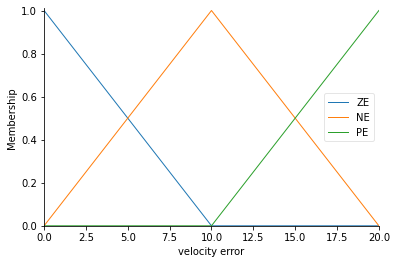

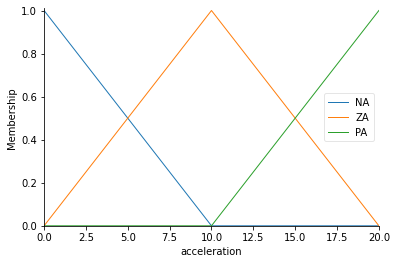

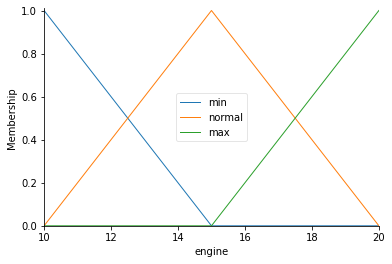

In [29]:
import numpy as np

import skfuzzy.control as ctrl

universe= np.linspace(0, 20, 61) 
universe1=np.linspace (10, 20, 61)

velocity_error=ctrl.Antecedent(universe, 'velocity error') 
acceleration = ctrl.Antecedent(universe,'acceleration')
engine=ctrl.Consequent(universe1,'engine')

name1=['ZE', 'NE', 'PE'] 
name2=['NA','ZA','PA']
name3=['min','normal','max']

velocity_error.automf(names=name1)
acceleration.automf(names=name2)
engine.automf(names=name3)
velocity_error.view()
acceleration.view()
engine.view()


In [30]:
rule0=ctrl.Rule(antecedent=((velocity_error['NE'] & acceleration[ 'NA']) |

(velocity_error['NE'] & acceleration['ZA'])|

(velocity_error['NE'] & acceleration['PA'])), consequent=engine['min'], label='rule Min')

rule1=ctrl.Rule(antecedent=((velocity_error['ZE'] & acceleration['NA'])|
(velocity_error['ZE'] & acceleration['ZA'])|
(velocity_error['ZE'] & acceleration['PA'])),consequent=engine['normal'], label='rule Normal')

In [31]:
rule2 = ctrl.Rule(antecedent=((velocity_error [ 'PE'] & acceleration['NA']) |

(velocity_error['PE'] & acceleration['ZA']) | 

(velocity_error['PE'] & acceleration['NA'])),

consequent=engine['max'], label='rule max')

In [32]:
system =ctrl.ControlSystem(rules=[rule0, rule1, rule2])

sim = ctrl.ControlSystemSimulation(system, flush_after_run=61*61 +1)

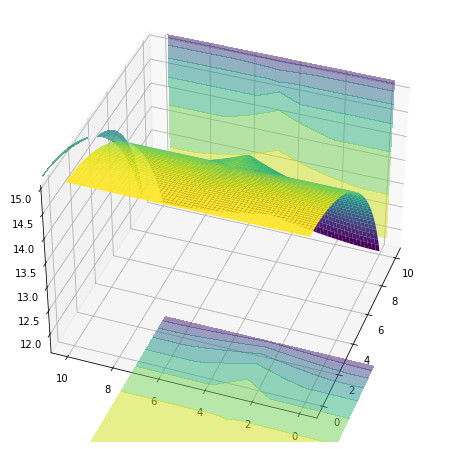

In [36]:
upsampled = np.linspace(0, 10, 61) 
x, y = np.meshgrid (upsampled, upsampled) 
z = np. zeros_like(x)

for i in range(61):

  for j in range(61): 
    sim.input['velocity error'] = x[i, j]

    sim.input['acceleration'] = y[i, j]

    sim.compute()

    z[i, j] = sim.output['engine']

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=8.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5)

cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5) 
cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)

ax.view_init(38, 200)